In [1]:
# "standard" imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
get_ipython().run_line_magic('matplotlib', 'inline')

### 1.	Upload Titanic dataset 

In [2]:
df = pd.read_csv('Titanic_original.csv')

### 2.	Define Survived column as TARGET variable 

In [3]:
y = df['Survived'].map({0: 'no', 1: 'yes'})
df = df.drop('Survived', axis=1)

### 3.	Select features that can be predictive of the survival stuatus

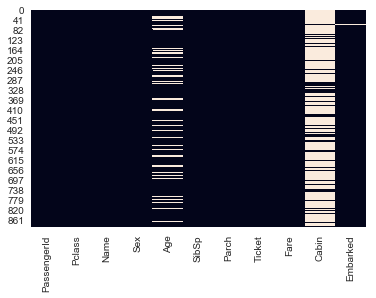

In [4]:
sns.heatmap(df.isnull(), cbar=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [6]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the data ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] might be suitable candidates for feature selection

In [7]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [8]:
# convert sex to categorical values
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)
df = df.drop('Sex', axis=1)

In [9]:
df[['C', 'Q', 'S']] = pd.get_dummies(df['Embarked'])
df = df.drop('Embarked', axis = 1)

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Male,C,Q,S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [12]:
# now find top 3 features
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
regrfe = LogisticRegression(solver='lbfgs', max_iter=10000)
regrfe.fit(df, y)
rfe = RFE(estimator=regrfe, n_features_to_select=5, step=1)
rfe.fit(df, y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [13]:
# print summaries for the selection of attributes
print(df.columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male', 'C', 'Q', 'S'], dtype='object')
[ True False  True False False  True  True False  True]
[1 4 1 2 5 1 1 3 1]


### 4.	Drop features that you think are not predictive and explain why they are being dropped 

In [14]:
# Based on the recursive feature selection ['Pclass', 'SibSb', 'Male', 'C', 'S'] are the significant columns
df = df[['Pclass', 'SibSp', 'Male', 'C', 'S']]

### 5.	Transform selected categorical features with Dummy values 


In [15]:
# Already completed in previous steps - see step 8, 9

### 6.	Import logistic regression function, train and test function from sklearn library 


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=0)

### 7.	Apply logistic regression on the split train/test dataset


In [18]:
reg = LogisticRegression(solver='lbfgs', max_iter=10000)
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### 8.	Compute your model’s accuracy using accuracy_score

In [19]:
y_pred = reg.predict(X_test)
print('Linear Regression Score')
print(reg.score(df,y))

Linear Regression Score
0.792368125701459


In [20]:
coeff_df = DataFrame(zip(df.columns, np.transpose(reg.coef_)))
print(coeff_df)

        0                       1
0  Pclass   [-0.8348402126833802]
1   SibSp   [-0.2755466554907618]
2    Male    [-2.592075119000191]
3       C   [0.26562131659893856]
4       S  [-0.31441483594587694]


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[152  32]
 [ 30  81]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.84      0.83      0.83       184
         yes       0.72      0.73      0.72       111

   micro avg       0.79      0.79      0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [23]:
from sklearn import metrics
print('Accuracy Score')
print(metrics.accuracy_score(y_test, y_pred))

Accuracy Score
0.7898305084745763
